<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/light_GBM_sono5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019.csv to testTotal2019.csv


In [3]:
import pandas as pd

dt = pd.read_csv('testTotal2019.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)

     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                            ...
1090  2019/8/27  ...                            3.8
1091  2019/8/28  ...                           10.0
1092  2019/8/29  ...                           10.0
1093  2019/8/30  ...                            7.8
1094  2019/8/31  ...                            6.3

[1095 rows x 24 columns]
     Unnamed: 0  ...  Average cloud volume (10 pct)
0      2016/9/1  ...                            4.3
1      2016/9/2  ...                            9.5
2      2016/9/3  ...                           10.0
3      2016/9/4  ...                           10.0
4      2016/9/5  ...                            8.3
...         ...  ...                  

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')



Index(['Unnamed: 0', 'total', 'man', 'woman', 'kokyuuki', 'sinndennzu',
       'sirinnji', 'kaitouOP', 'kaikyouOP', 'kaifukuOP', 'honenoOP',
       'fukukuukyou', 'elseOP', 'Average temperature (C)',
       'Lowest temperature ?', 'Maximum temperature ?',
       'Total precipitation (mm)', 'Daylight Hours (Hours)',
       'Deepest Snow (cm)', 'Total snowfall (cm)', 'Total snowfall (cm).1',
       'Minimum relative humidity (%)', 'Average local pressure (hPa)',
       'Average cloud volume (10 pct)'],
      dtype='object')
Index(['Unnamed: 0'], dtype='object')
      total  man  ...  Average local pressure (hPa)  Average cloud volume (10 pct)
0       165   90  ...                        1006.6                            4.3
1       161   87  ...                        1012.7                            9.5
2       156   80  ...                        1015.2                           10.0
3       156   78  ...                        1015.4                           10.0
4       171   84  .

ValueError: ignored

<Figure size 1440x1080 with 0 Axes>

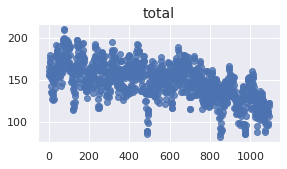

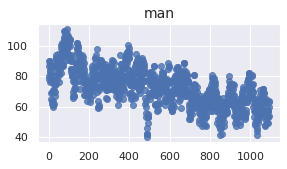

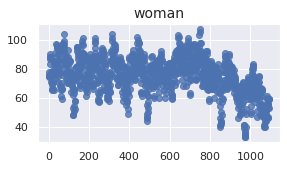

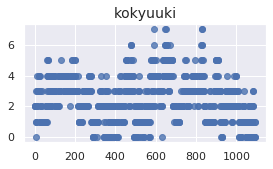

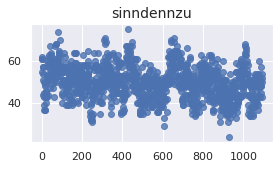

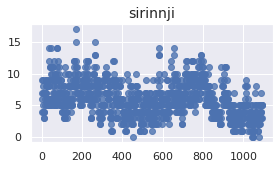

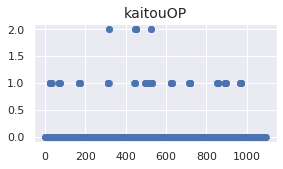

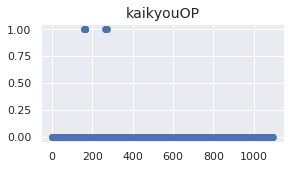

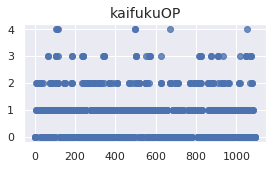

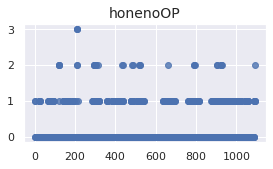

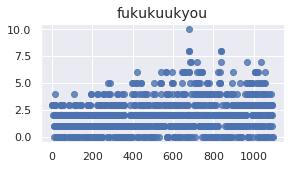

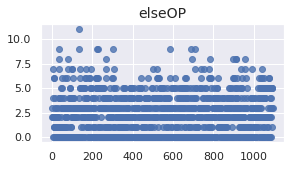

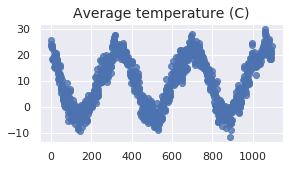

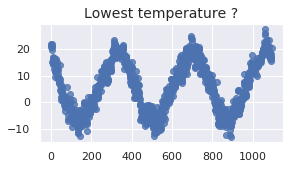

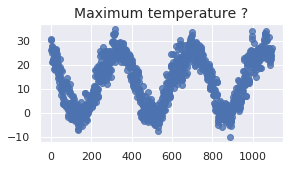

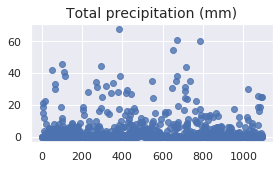

<Figure size 1440x720 with 0 Axes>

In [7]:
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)


def data_plot(data):
    plt.figure(figsize=(20,15))
    plt.tight_layout()
    plt.suptitle("Feature Plot",fontsize=20)
    plt.subplots_adjust(top=0.93)
    for i in range(len(data.columns)):
        plt.figure(figsize=(20,10))
        plt.subplot(4,4,i+1)
        plt.plot(data.iloc[:,i:i+1],linestyle="None",marker="o",alpha=0.8)
        plt.title(data.columns[i],fontsize=14)    



data_plot(dtt)

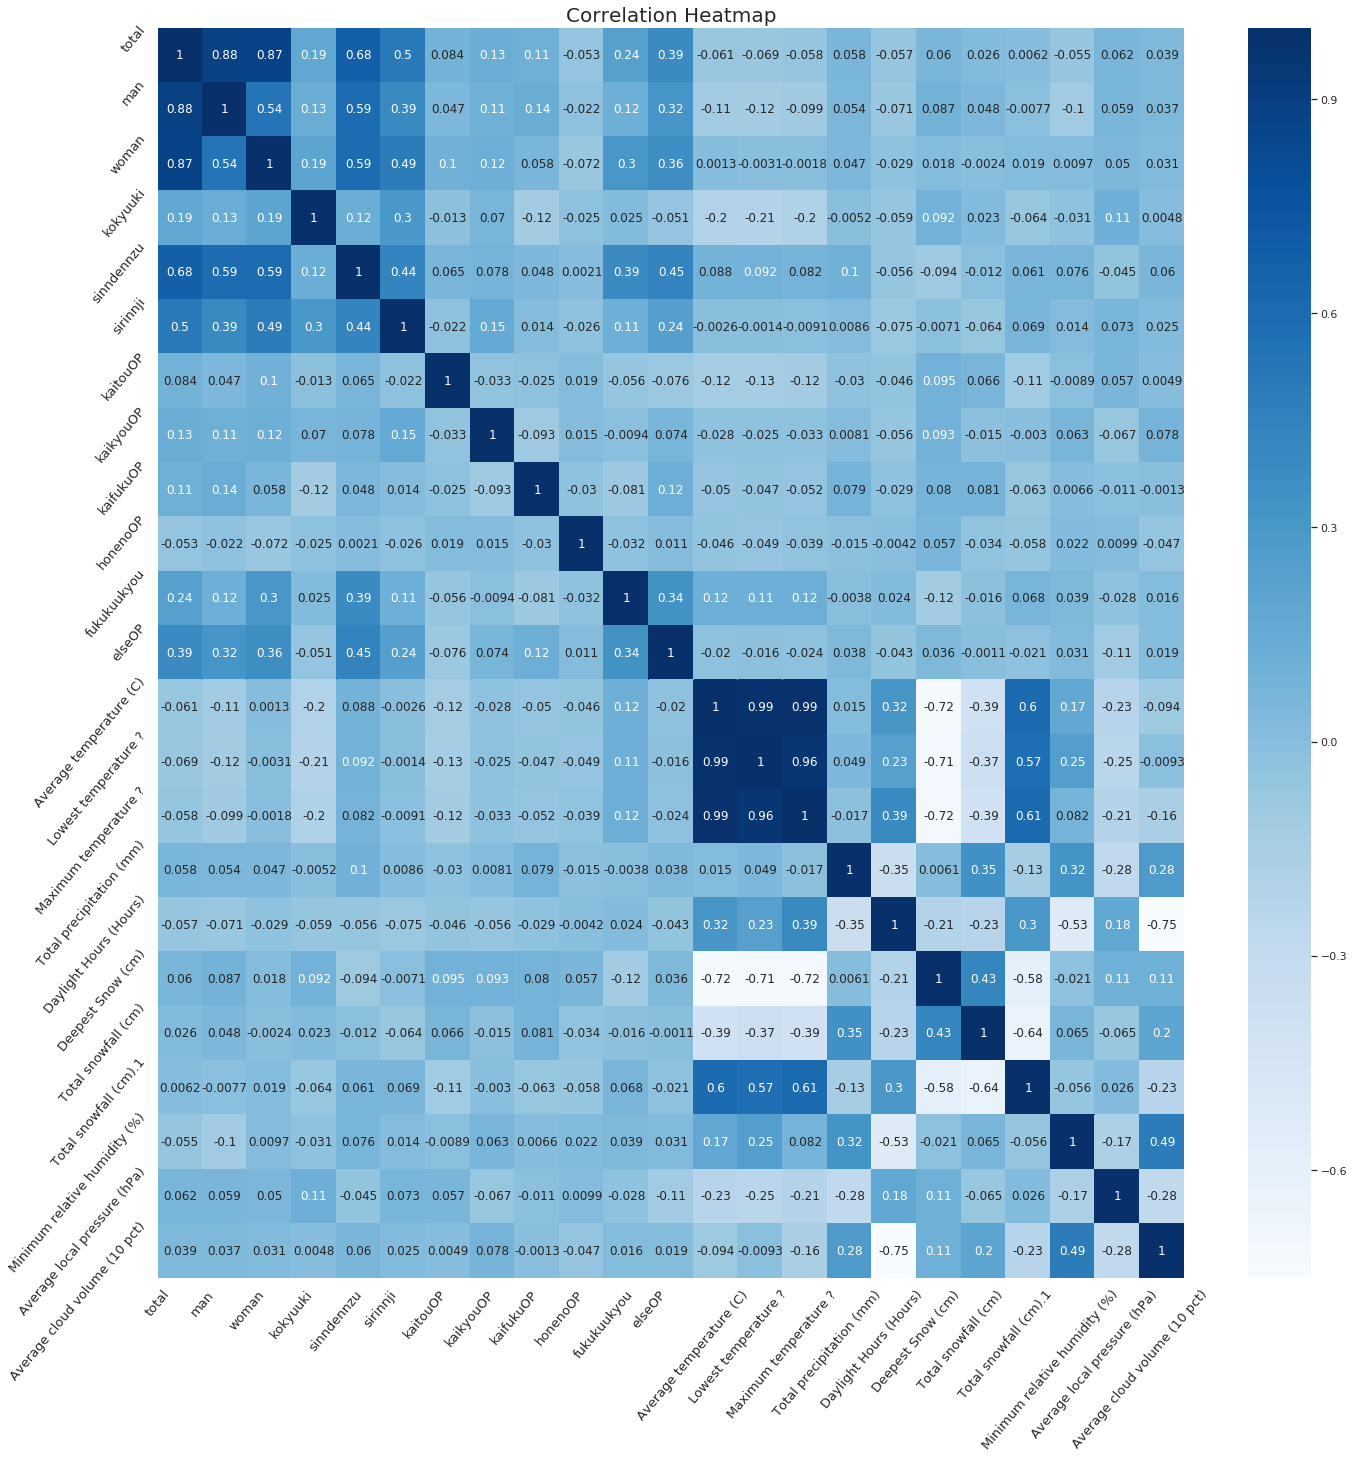

In [9]:
def correlatio_heatmap(data):#numpy.corrcoefで相関係数を見れる
    corr = np.corrcoef(data.T)
    columns = data.columns
    tick = np.arange(0,23)
    plt.figure(figsize=(23,23))
    sns.heatmap(corr,annot=True,cmap="Blues")
    plt.title("Correlation Heatmap",fontsize=20)
    plt.yticks(tick,columns,rotation=50, fontsize=13)
    plt.xticks(tick,columns,rotation=50, fontsize=13)

correlatio_heatmap(dtt)

          total  ...  Average cloud volume (10 pct)
kokyuuki         ...                               
0         11567  ...                          662.4
1         35161  ...                         1823.1
2         38687  ...                         1835.5
3         38914  ...                         1907.1
4         25429  ...                         1261.0
5          9547  ...                          447.4
6          2127  ...                          122.5
7           757  ...                           39.5

[8 rows x 22 columns]


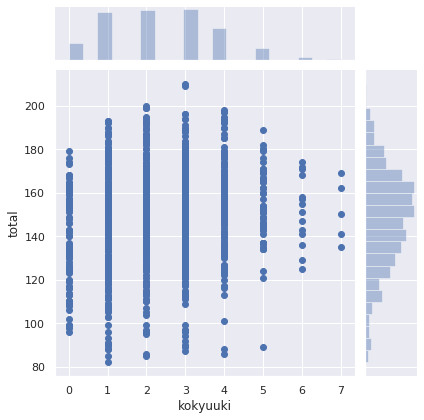

In [10]:
gps = dtt.groupby('kokyuuki').sum()
print(gps)
sns.jointplot('kokyuuki', 'total', data=dtt)

In [0]:

# LightGBM
import lightgbm as lgb
 
# Scikit-learn（評価算出）
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

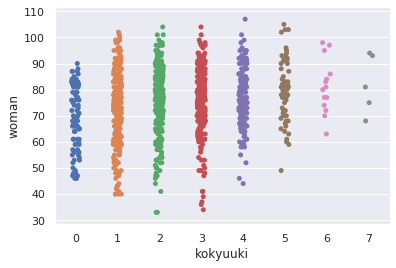

In [12]:
sns.stripplot(x="kokyuuki", y="woman", data=dtt)

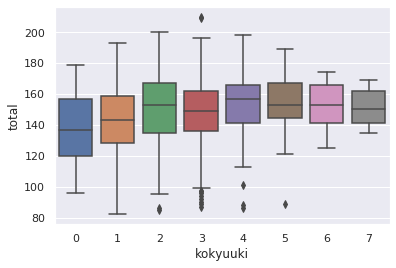

In [13]:
sns.boxplot(x="kokyuuki", y="total", data=dtt)

X_train.shape
(770, 3)
Y_train.shape
(770, 1)














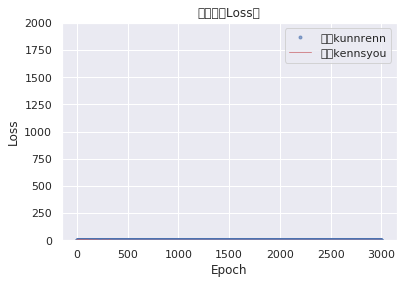

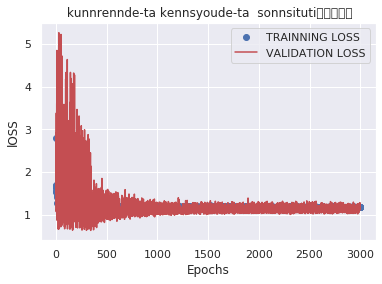

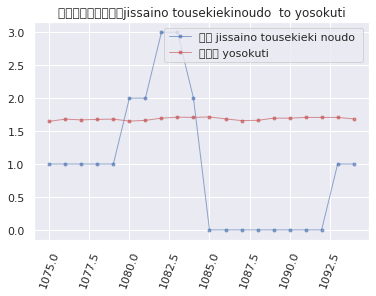

二乗平均平方根誤差（RMSE） : 1.221
20/20 [==============================] - 0s 214us/step
[1.0926830768585205, 0.15000000596046448]
test_r2_score
-0.572478031549988


In [14]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



## エポック数
epochs = 3000

target = dtt["kokyuuki"].values
sentoral1 = dtt["total"].values
sentoral2 = dtt["man"].values
consoul1 = dtt["woman"].values

lookback = 3

def data_split(data, start, end, lookback,consoul1,sentoral1,sentoral2):
    length = abs(start-end)
    X = np.zeros((length, lookback))
    y = np.zeros((length, 1))
    
    for i in range(length):
        j = start - lookback + i
        k = j + lookback
        
        X[i] = consoul1[k]
        X[:,[1]]=sentoral1[k]
        X[:,[2]]=sentoral2[k]
        y[i] = data[k]
    return X, y

(X_train, y_train) = data_split(target, -800, -30, lookback,consoul1,sentoral1,sentoral2)

(X_valid, y_valid) = data_split(target, -60, -30, lookback,consoul1,sentoral1,sentoral2)
(X_test, y_test) = data_split(target, -20, 0, lookback,consoul1,sentoral1,sentoral2)

print("X_train.shape")
print(X_train.shape)
print("Y_train.shape")
print(y_train.shape)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))




model.compile(optimizer=RMSprop(), loss='mae', metrics=['accuracy'])


result = model.fit(X_train, y_train, 
                  verbose=0,   ## 詳細表示モード 
                  epochs=epochs, 
                  batch_size=64, 
                  shuffle=True, 
                  validation_data=(X_valid, y_valid))

## 訓練の損失値をプロット
epochs = range(len(result.history['loss']))
plt.title('損失値（Loss）')
plt.plot(epochs, result.history['loss'], 'bo', alpha=0.6, marker='.', label='訓練kunnrenn', linewidth=1)
plt.plot(epochs, result.history['val_loss'], 'r', alpha=0.6, label='検証kennsyou', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, 2000)
plt.show()


## 予測値
df_predict =  pd.DataFrame(model.predict(X_test), columns=['予測値yosokuti'])


## kunnrennde-ta kennsyoude-ta  sonnsitutiをプロット
history_dict = result.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values) + 1)
pre_date = df.index[-len(y_test):].values
plt.title(" kunnrennde-ta kennsyoude-ta  sonnsitutiをプロット")
plt.plot(epochs,loss_values,'bo',label='TRAINNING LOSS')
plt.plot(epochs,val_loss_values,'r',label='VALIDATION LOSS')
plt.xlabel('Epochs')
plt.ylabel('lOSS')
plt.legend()
plt.show()


## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title("実際の終値と予測値jissaino tousekiekinoudo  to yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino tousekieki noudo ", linewidth=1)
plt.plot(pre_date, df_predict['予測値yosokuti'].values, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test, df_predict["予測値yosokuti"].values)))
results = model.evaluate(X_test,y_test)
print(results )

## test_r2_score計算
from sklearn.metrics import r2_score
test_r2_score = r2_score(y_test, df_predict["予測値yosokuti"].values)
print("test_r2_score")
print(test_r2_score)



回帰係数
[0.15418931]
切片 (誤差)
1.489564765071456
決定係数
0.08856467850020489
------------------------------------------------------------
                             Name  Coefficients
1                             man     -1.380895
2                           woman     -1.366668
5                        kaitouOP     -0.298966
7                       kaifukuOP     -0.186088
10                         elseOP     -0.120224
12           Lowest temperature ?     -0.116004
8                        honenoOP     -0.059255
13          Maximum temperature ?     -0.021475
17            Total snowfall (cm)     -0.008652
16              Deepest Snow (cm)     -0.005339
20   Average local pressure (hPa)      0.001580
14       Total precipitation (mm)      0.002979
9                     fukukuukyou      0.008026
19  Minimum relative humidity (%)      0.008608
3                      sinndennzu      0.009397
21  Average cloud volume (10 pct)      0.011035
15         Daylight Hours (Hours)      0.014432
18    

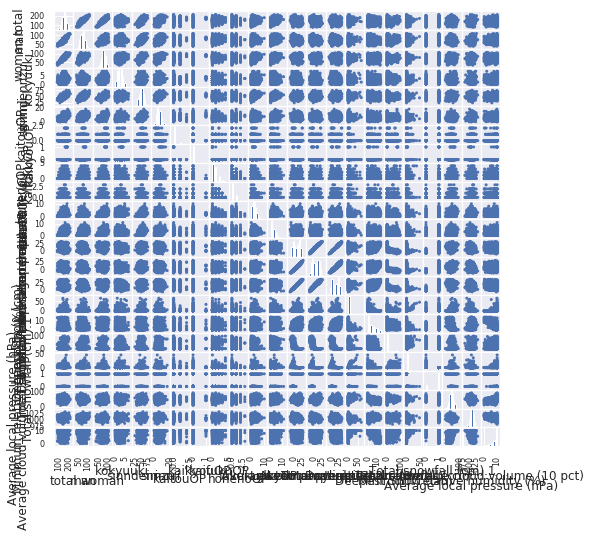

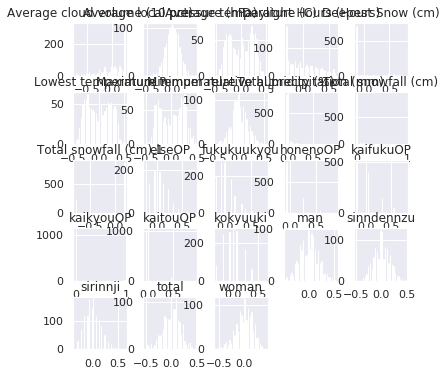

[ 0.13189212  0.10064212  0.06157962 ... -0.19623288 -0.20404538
 -0.32123288]
                             Name  Coefficients
18          Total snowfall (cm).1      0.015505
20   Average local pressure (hPa)      0.076616
9                     fukukuukyou      0.080256
21  Average cloud volume (10 pct)      0.110350
6                       kaikyouOP      0.147676
8                        honenoOP      0.177765
14       Total precipitation (mm)      0.201061
15         Daylight Hours (Hours)      0.203496
17            Total snowfall (cm)      0.380674
3                      sinndennzu      0.479259
16              Deepest Snow (cm)      0.512575
5                        kaitouOP      0.597932
19  Minimum relative humidity (%)      0.723088
7                       kaifukuOP      0.744351
13          Maximum temperature ?      0.966375
10                         elseOP      1.322462
4                        sirinnji      2.314692
11        Average temperature (C)      3.559278
12       

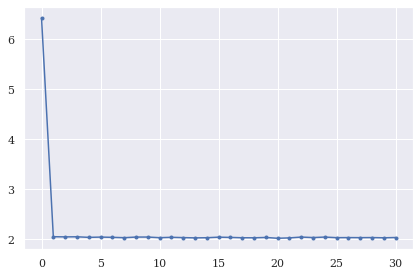

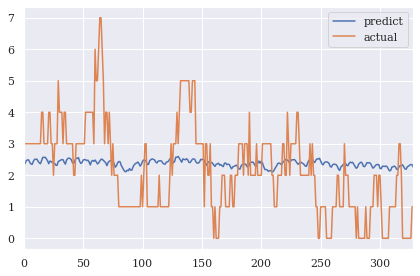

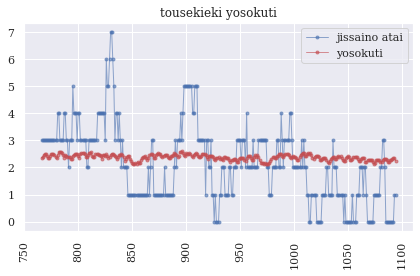

二乗平均平方根誤差（RMSE） : 1.385
329/329 [==============================] - 0s 486us/step
seikairituprint
1.919185564510728
Epoch 1/1
766/766 [==============================] - 0s 275us/step - loss: 2.0224
test_r2_score
0.03629087489200722


In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=1, figsize=(8, 8), diagonal='hist', range_padding=0.5)

# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# 説明変数に "density (濃度)" を利用
X = df.loc[:, ['sirinnji']].values
 
# 目的変数に "target" を利用
Y = df['kokyuuki'].values
# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数
print("回帰係数")
print(clf.coef_)
 
# 切片 (誤差)
print("切片 (誤差)")
print(clf.intercept_)
 
# 決定係数
print("決定係数")
print(clf.score(X, Y))

print("------------------------------------------------------------")

# 説明変数に "kokyuuki(kokyuukiスコア以外すべて)" を利用
wine_except_quality = dtt.drop('kokyuuki', axis=1)
X = wine_except_quality.values
 
# 目的変数に "kokyuuki" を利用
Y = dtt['kokyuuki'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")

 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
wine2.hist(bins=30,rwidth=0.2 ,figsize=(6,6), color = 'orange') ;
plt.tight_layout()
plt.show()


print(wine2['total'].values)

# 説明変数に "quality (kokyuukiスコア以外すべて)" を利用
wine2_except_quality = wine2.drop('kokyuuki', axis=1)
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = df['kokyuuki'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)


print("------------------------------------------------------------")



sirinnji = df['total'].values
sirinnji2 = preprocessing.minmax_scale(sirinnji)
print(sirinnji2)

kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)
print(kaifukuOP2)

#youso3 = df['men'].values
#youso3seikika = preprocessing.minmax_scale(kaifukuOP)
#print(youso3seikika)

sika=np.array([[sirinnji2,kaifukuOP2]])
si=sika.T
X=si

print(X)
print("X.shape")
print(X.shape)

maxlen = 10
Y = []
for i in range(len(df)):
 
    #df[[]]de2jigennhairetu  iloc は 行、列を番号で指定します（先頭が 0）iloc[i:(i+maxlen)]カッコ内の数値はスライス形式で[行の開始位置:行の終了位置-1].valuesまとめて「値」のみをリストで取り出し
    Y.append(df[['kokyuuki']].iloc[i].values)
    #Y.append

#Y=np.array(Y)

Y=np.array(Y)


print("X.shape[0]")
print(X.shape[0])
print("X.shape[1]")
print(X.shape[1])
print("X.shape[2]")
print(X.shape[2])

print("Y")
print(Y)

print("Y.shape")
print(Y.shape)


print("X[1][0][0]")
print(X[1][0][0])
print("X[0][1][0]")
print(X[0][1][0])
print("X[0][0][0]")
print(X[0][0][0])


# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.70)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 


# 隠れ層の数などを定義: 隠れ層の数が大きいほど精度が上がる?
n_in = 1 # len(X[0][0])
n_out = 1 # len(Y[0])
n_hidden = 50

#モデル作成 (Kerasのフレームワークで簡易に記載できる)
#LSTM の入力は、三次元になっていて、訓練データの数×1つの訓練データの入力の長さ×変数の数となっています。


model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, X_train.shape[1], n_in),
               kernel_initializer='random_uniform',
               return_sequences=False))
model.add(Dense(n_in, kernel_initializer='random_uniform'))
model.add(Dense(n_in, kernel_initializer='random_uniform'))
model.add(Activation("linear"))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "mean_squared_error", optimizer=opt)

early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)
hist = model.fit(X_train, y_train, batch_size=5, epochs=10000,
                 callbacks=[early_stopping])


#オプティマイザ（最適化アルゴリズム）はモデルをコンパイルする際に必要となるパラメータの1つです:

#results = model.evaluate(X_test, y_test)
#print(results)

# 損失のグラフ化
loss = hist.history['loss']
epochs = len(loss)
plt.rc('font', family='serif')
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(epochs), loss, marker='.', label='loss(training data)');
plt.tight_layout()
plt.show()


# 予測結果
predicted = model.predict(X_test)
result = pd.DataFrame(predicted)
result.columns = ['predict']
result['actual'] = y_test
result.plot();
plt.tight_layout()
plt.show()


## 予測値
df_predict =  pd.DataFrame(model.predict(X_test), columns=['yosokuti'])
#seisuuhyoujinobaai ikanonyuuryoku 
#df_predicts = np.round(df_predict)
#print(df_predicts)


## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title("tousekieki yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="jissaino atai", linewidth=1)
plt.plot(pre_date, df_predict['yosokuti'].values, 'r', alpha=0.6, marker='.', label="yosokuti", linewidth=1)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True);
plt.tight_layout()
plt.show()

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test, df_predict["yosokuti"].values)))
results = model.evaluate(X_test,y_test)
print("seikairituprint")
print(results)

model.fit (X_train,y_train)
y_pred = model.predict(X_test)

test_r2_score = r2_score(y_test,y_pred)
print("test_r2_score")
print(test_r2_score)


[0.6484375 0.6171875 0.578125  ... 0.3203125 0.3125    0.1953125]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
[0.56756757 0.55405405 0.58108108 ... 0.35135135 0.35135135 0.27027027]
[[ 0.6484375   0.56756757 90.        ]
 [ 0.6171875   0.55405405 87.        ]
 [ 0.578125    0.58108108 80.        ]
 ...
 [ 0.3203125   0.35135135 64.        ]
 [ 0.3125      0.35135135 63.        ]
 [ 0.1953125   0.27027027 54.        ]]
X.shape
(1095, 3)
Y [2 2 2 ... 0 1 1]
(1095,)
X_train.shape
(766, 3)
Y_train.shape
(766,)
X_test
[[3.20312500e-01 4.72972973e-01 5.50000000e+01]
 [3.35937500e-01 5.00000000e-01 5.50000000e+01]
 [4.60937500e-01 6.21621622e-01 6.20000000e+01]
 [4.92187500e-01 6.75675676e-01 6.20000000e+01]
 [4.76562500e-01 7.43243243e-01 5.50000000e+01]
 [3.75000000e-01 6.21621622e-01 5.10000000e+01]
 [3.04687500e-01 5.40540541e-01 4.80000000e+01]
 [2.89062500e-01 5.13513514e-01 4.80000000e+01]
 [4.21875000e-01 6.35135135e-01 5.60000000e+01]
 [5.07812500e-01 7.43

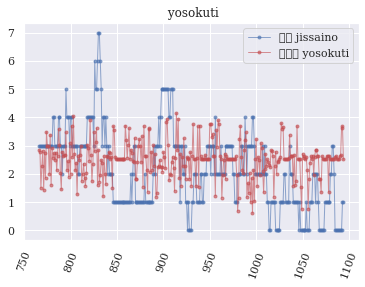

In [51]:
sirinnji = df['total'].values
sirinnji2 = preprocessing.minmax_scale(sirinnji)
print(sirinnji2)

kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)
print(kaifukuOP2)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)
print(youso3seikika)

sika=np.array([sirinnji2,kaifukuOP2,youso3])
si=sika.T
X=si

print(X)
print("X.shape")
print(X.shape)



targetk = df['kokyuuki'].values
siY=targetk.T
Y=siY

print("Y",  Y)


print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.70)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 



print("X_train.shape")
print(X_train.shape)
print("Y_train.shape")
print(y_train.shape)
print("X_test")
print(X_test)
print("X_test.shape")
print(X_test.shape)
print("Y_test.shape")
print(y_test.shape)

from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


lgb_params = {
   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,
            }

lgb_model = lgb.LGBMRegressor(**lgb_params)
lgb_model = lgb.LGBMRegressor()
# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認
print("Y_pred")
print(Y_pred)

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()
